# Фитнес-центр "Культурист-датасаентист"

## Описание проекта
Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.
Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. 
Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. 
Задача — провести анализ и подготовить план действий по удержанию клиентов.
А именно:
 - научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
 - сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
 - проанализировать основные признаки, наиболее сильно влияющие на отток;
 - сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
        1) выделить целевые группы клиентов;
        2) предложить меры по снижению оттока;
        3) определить другие особенности взаимодействия с клиентами.

Описание данных

«Культурист-датасаентист» предоставил сведения в csv-файлах. Заказчик подготовил данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц. Набор данных включает следующие поля:
    
    Данные клиента за предыдущий до проверки факта оттока месяц:
        'gender' — пол;
        'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
        'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
        Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
        'Phone' — наличие контактного телефона;
        'Age' — возраст;
        'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).

    Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
        'Contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
        'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
        'Group_visits' — факт посещения групповых занятий;
        'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
        'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
        'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
        'Churn' — факт оттока в текущем месяце.

## Загрузка данных и исследовательский анализ данных

In [1]:
#импортируем библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans

In [2]:
#читаем и сохраняем данные
data=pd.read_csv('/datasets/gym_churn.csv')

In [3]:
#просматриваем размер данных
data.shape

(4000, 14)

In [4]:
#просматриваем информацию о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

Пустых данных не выявлено, тип данных верный.

In [5]:
#изучаем средние значения
data.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Анализируя средние значения данных выявляем, что мужчин и женщин - равное число. 
В данных больше тех, кто живет рядом с фитнес-центром.
30 процентов тех, кто является сотрудником компании-партнера клуба. 
Средняя длительность текущего действующего абонемента - 4 месяца. 
41 процент клиентов посещает групповые занятия. 
Средний возраст клиентов - 29 лет.
Средняя выручка  от других услуг фитнес-центра - 147.
Средняя частота посещений в неделю за все время с начала действия абонемента - 1,9 раз.
средняя частота посещений в неделю за предыдущий месяц - 1,8 раз.
В текущем месяце факт оттока - 27%.

In [6]:

#просматриваем средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался 
data.groupby('Churn').mean().T

Churn,0,1
gender,0.510037,0.510839
Near_Location,0.873086,0.768143
Partner,0.534195,0.355325
Promo_friends,0.353522,0.183789
Phone,0.903709,0.902922
Contract_period,5.747193,1.728558
Group_visits,0.464103,0.268615
Age,29.976523,26.989632
Avg_additional_charges_total,158.445715,115.082899
Month_to_end_contract,5.283089,1.662582


В обеих группах мужчин и женщин почти поровну. 
Люди, живущие ближе к фитнес-центру, остаются с большей вероятностью. 
Являться сотрудником компании-партнера также влияет в лучшую сторону.
Если клиент является участником акции "Приведи друга", также является хорошм показателем.
У клиентов, которые покинилу клуб, период абонемента значительно ниже.
Клиенты, покинувшие клубы, меньше посещали групповые занятия.
Средний возраст покинувших клуб - 27 лкт, что на 3 года меньше, чем у оставшихся.
Суммарная выручка от других услуг у покинувших клуб ниже - 115 по сравнению с 158.
Средняя частота посещений в неделю за все время с начала действия абонемента, а также средняя частота посещений в неделю за предыдущий месяц тоже ниже у клиентов, покивнуших клуб.

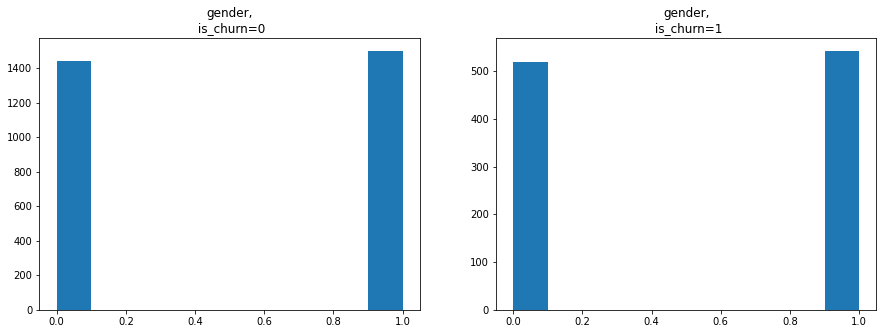

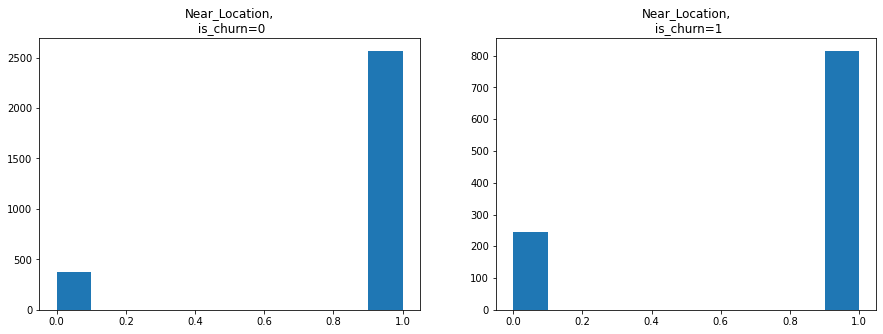

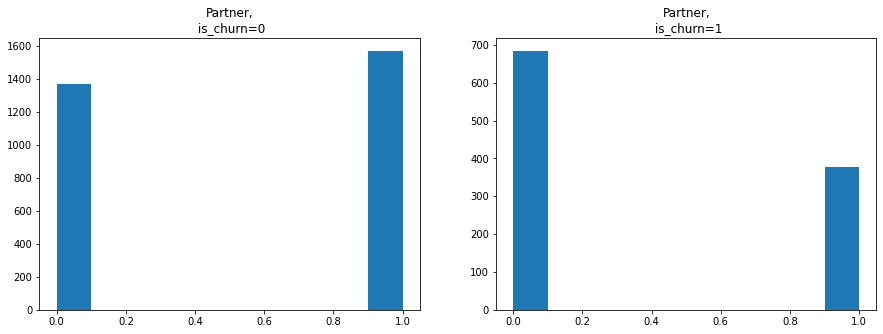

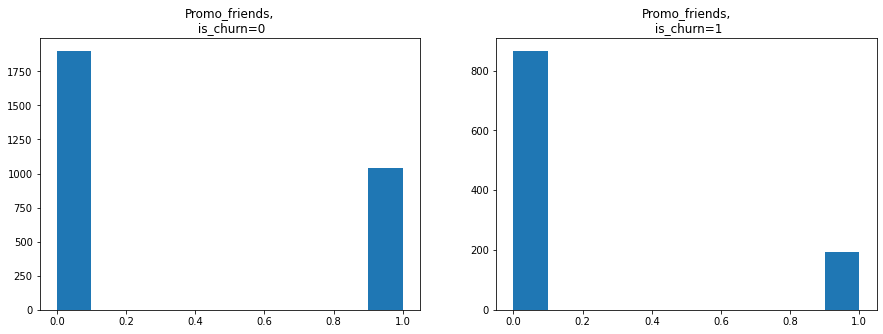

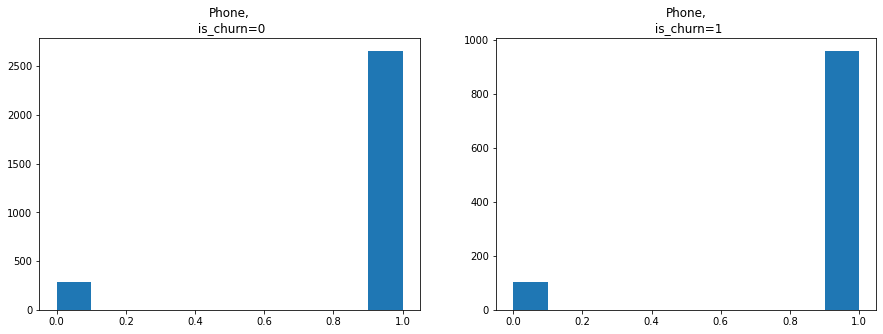

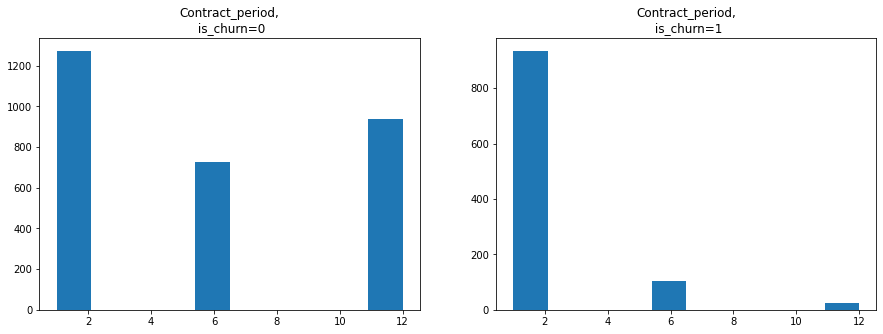

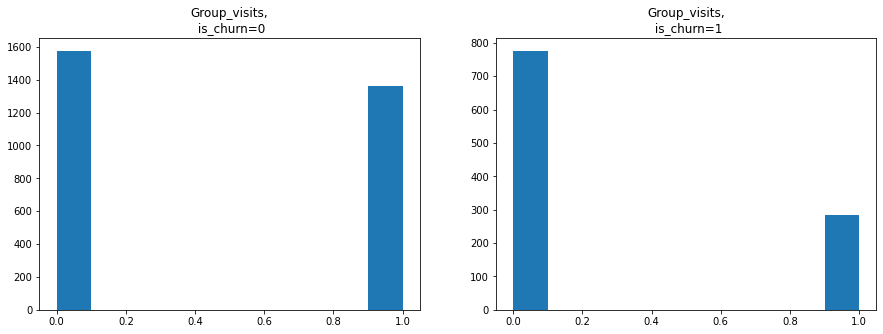

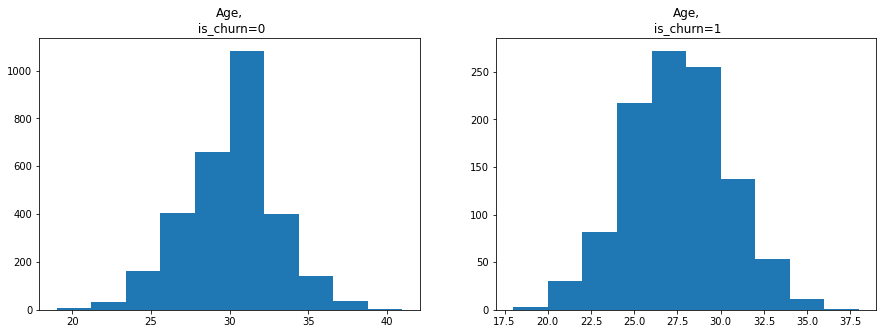

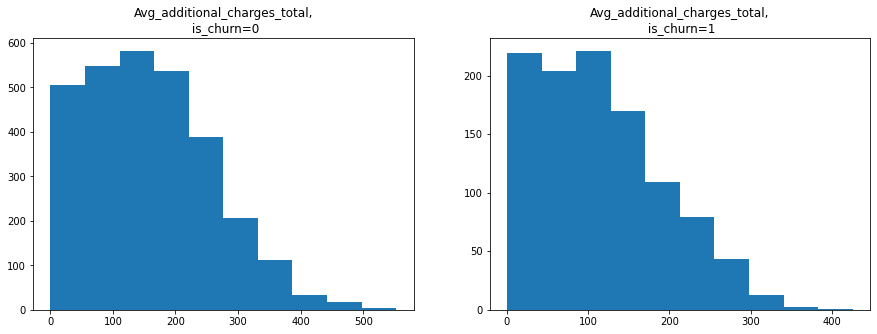

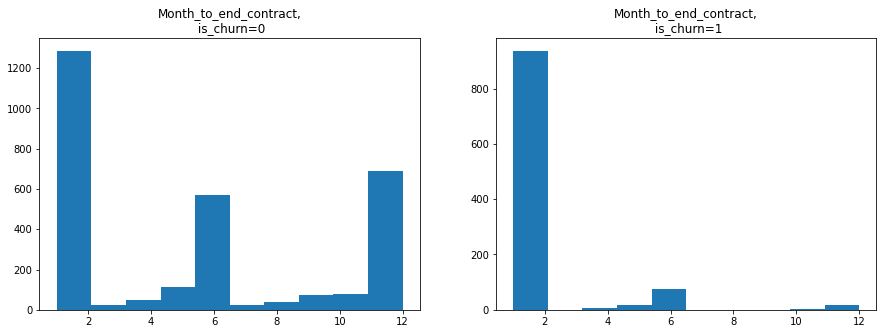

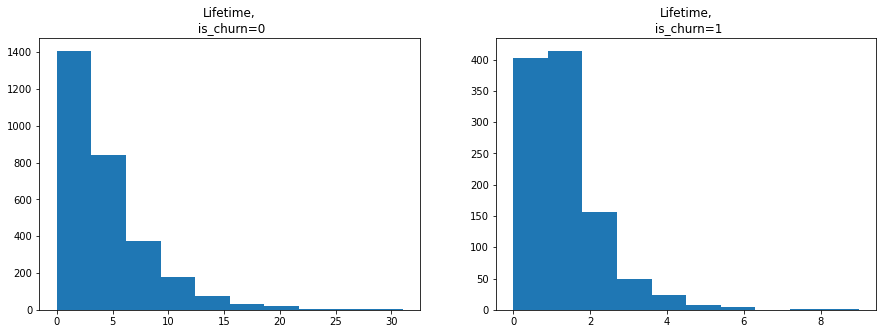

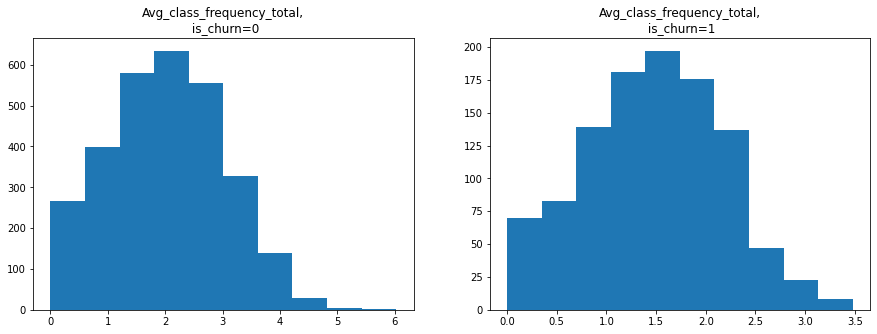

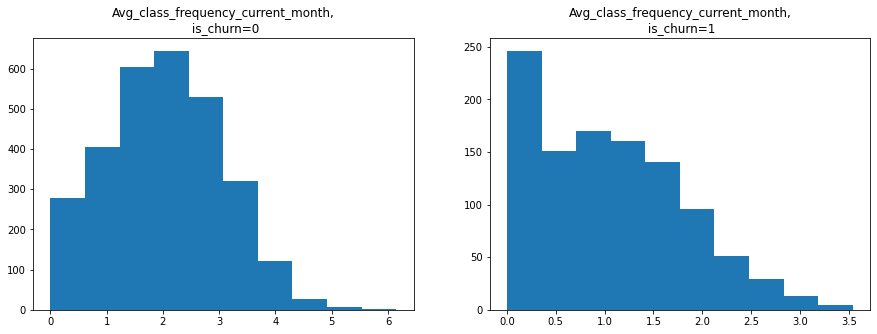

In [7]:
# создать функцию для построения гисотограммы
def create_hist_by_column(column, x, y, is_churn):
    '''
    column — колонка таблицы
    x — положение в subplots (колонка)
    y — положение в subplots (строка)
    is_churn — факт оттока (0 или 1)
    '''    
    (data[data['Churn'] == is_churn][column]
     .hist(grid=False, ax=ax[x])
     .set(title=column + f',\n is_churn={is_churn}'));

for x in data.drop('Churn', axis = 1).columns.to_list():
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    create_hist_by_column(x, 0, 0, 0)
    create_hist_by_column(x, 1, 0, 1)
    plt.show()

In [8]:
#построим и отрисуем матрицу корреляций
cm = data.corr() #вычисляем матрицу корреляций


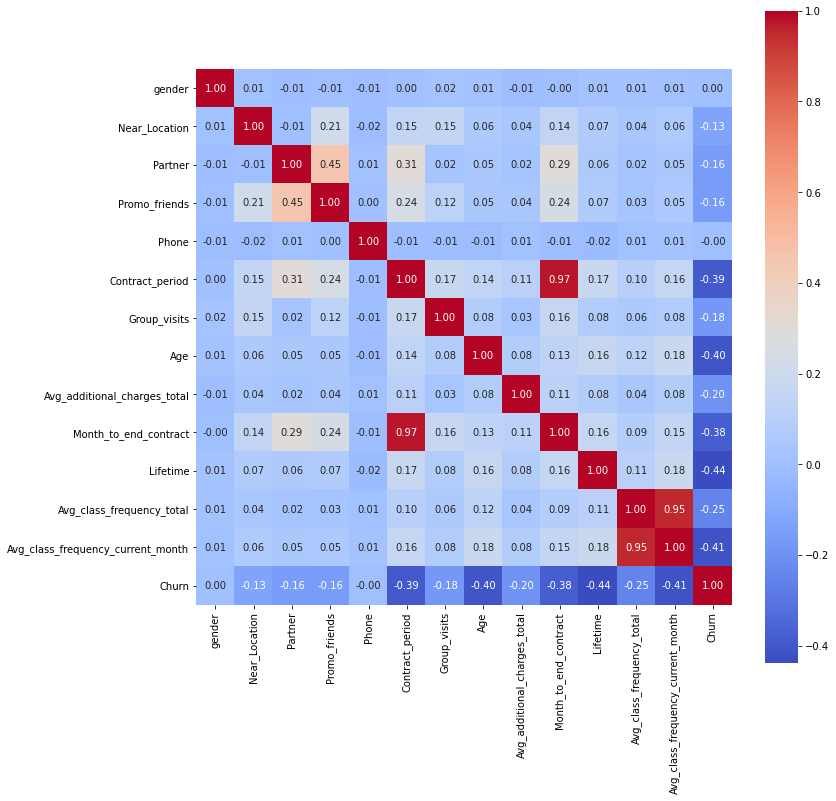

In [9]:
#нарисуем тепловую карту с подписями для матрицы корреляций
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(cm, annot=True, square=True, ax=ax, fmt=".2f", cmap = 'coolwarm')#ваш код здесь
plt.show()

Анализируя корреляцию, можно сделать вывод, что наблюдается зависимоть между средней частотой посещений в неделю за предыдущий месяц и средней частотой посещений в неделю за предыдущий месяц.
Также коррелируют между собой срок до окончания текущего действующего абонемента (в месяцах) и длительность текущего действующего абонемента (месяц, 6 месяцев, год).

Анализируя показатели корреляции целевого признака 'Churn', стоит отметить, что ярких зависимостей не выявлено, однако самая яркая отрицательная зависимость наблюдается по показателю "время с момента первого обращения в фитнес-центр (в месяцах)".

### Выводы по исследовательскому анализу данных
    Анализируя средние значения данных выявляем:
        - Мужчин и женщин, посещающих клуб - равное число
        - В данных больше тех, кто живет рядом с фитнес-центром.
        - 30 процентов тех, кто является сотрудником компании-партнера клуба. 
        - Средняя длительность текущего действующего абонемента - 4 месяца. 
        - 41 процент клиентов посещает групповые занятия. 
        - Средний возраст клиентов - 29 лет.
        - Средняя выручка  от других услуг фитнес-центра - 147.
        - Средняя частота посещений в неделю за все время с начала действия абонемента - 1,9 раз.
        - Средняя частота посещений в неделю за предыдущий месяц - 1,8 раз.
        - В текущем месяце факт оттока - 27%.
    
    Анализируя средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался  выявляем:
        - В обеих группах мужчин и женщин почти поровну. 
        - Люди, живущие ближе к фитнес-центру, остаются с большей вероятностью. 
        - Являться сотрудником компании-партнера также влияет в лучшую сторону.
        - Если клиент является участником акции "Приведи друга", также является хорошм показателем.
        - У клиентов, которые покинилу клуб, период абонемента значительно ниже.
        - Клиенты, покинувшие клубы, меньше посещали групповые занятия.
        - Средний возраст покинувших клуб - 27 лет, что на 3 года меньше, чем у оставшихся.
        - Суммарная выручка от других услуг у покинувших клуб ниже - 115 по сравнению с 158.
        - Средняя частота посещений в неделю за все время с начала действия абонемента, а также средняя частота посещений в  неделю за предыдущий месяц тоже ниже у клиентов, покивнуших клуб.
        
    Анализируя корреляцию, можно сделать вывод, что наблюдается зависимоть между средней частотой посещений в неделю за предыдущий месяц и средней частотой посещений в неделю за предыдущий месяц. Также коррелируют между собой срок до окончания текущего действующего абонемента (в месяцах) и длительность текущего действующего абонемента (месяц, 6 месяцев, год).

## Модель прогнозирования оттока клиентов

In [10]:
#разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = data.drop('Churn', axis=1)
y = data['Churn']

#разделяем модель на обучающую и валидационную выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#создадим объект класса StandardScaler и применим его к обучающей выборке
scaler =  StandardScaler()
X_train_st = scaler.fit_transform(X_train) #обучаем scaler и одновременно трансформируем матрицу для обучающей выборки


#применяем стандартизацию к матрице признаков для тестовой выборки
X_test_st = scaler.transform(X_test)

In [11]:
#Обучаем модель способом случайным лесом, задаем алгоритм для модели
forest_model = RandomForestClassifier(random_state = 0, n_estimators = 100)

#обучаем модель
forest_model.fit(X_train_st, y_train)

#делаем прогноз
forest_predictions = forest_model.predict(X_test_st) 
print('Случайный лес')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, forest_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, forest_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, forest_predictions)))
print()

#Обучаем модель способом логистической регрессией, задаем алгоритм для модели
logistic_model = LogisticRegression(random_state=0)

##обучаем модель
logistic_model.fit(X_train_st, y_train)

#делаем прогноз
logistic_predictions = logistic_model.predict(X_test_st) 
print('Логистическая регрессия')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, logistic_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, logistic_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, logistic_predictions)))

Случайный лес
Accuracy: 0.93
Precision: 0.90
Recall: 0.80

Логистическая регрессия
Accuracy: 0.94
Precision: 0.91
Recall: 0.85


### Вывод по модели прогнозирования оттока клиентов
Как логистическая регрессия, так и алгоритм случайного леса показали хороший результат, однако логистическая регрессия оказалась чуть-чуть лучше, чем случайный лес

## Кластеризация клиентов

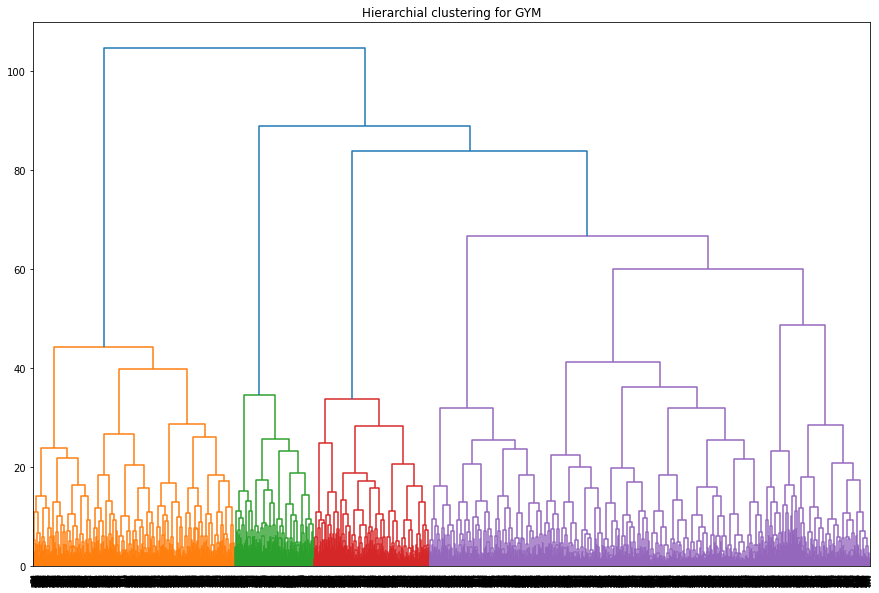

In [12]:
#стандартизируем данные без оттока
x_sc = scaler.fit_transform(data.drop('Churn', axis = 1)) 

linked = linkage(x_sc, method = 'ward') 

#строим дендрограмму
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering for GYM')
plt.show() 

Предложено оптимальное число кластеров - 4

In [13]:
# задаём модель k_means с числом кластеров 5 и фиксируем значение random_state
km = KMeans(n_clusters=5, random_state=0)
# прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 4)
labels =  km.fit_predict(x_sc)

# сохраняем метки кластера в поле нашего датасета
data['cluster_km'] = labels

# выводим статистику по средним значениям наших признаков по кластеру
data_group=data.groupby(['cluster_km']).mean()
display(data_group)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster_km,,,,,,,,,,,,,,
0,0.502970,0.959406,0.783168,0.574257,1.000000,10.889109,0.542574,29.982178,160.761016,9.954455,4.736634,1.982055,1.974789,0.027723
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,0.559666,0.976134,0.356802,0.230310,0.998807,2.669451,0.473747,30.125298,161.657905,2.459427,4.898568,2.852002,2.850161,0.068019


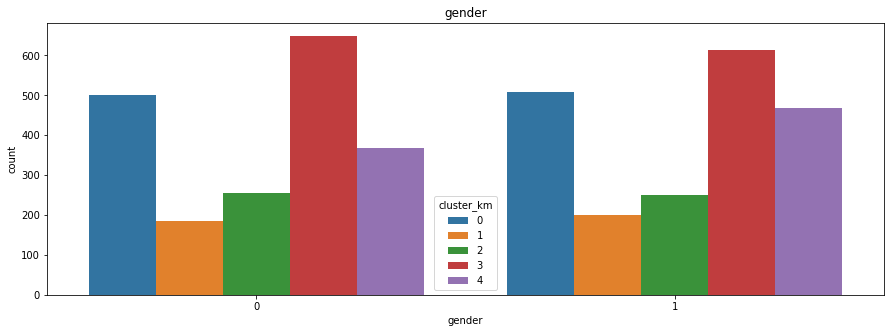

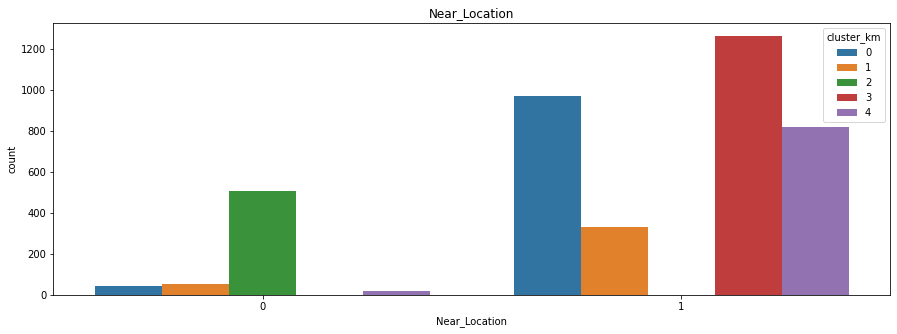

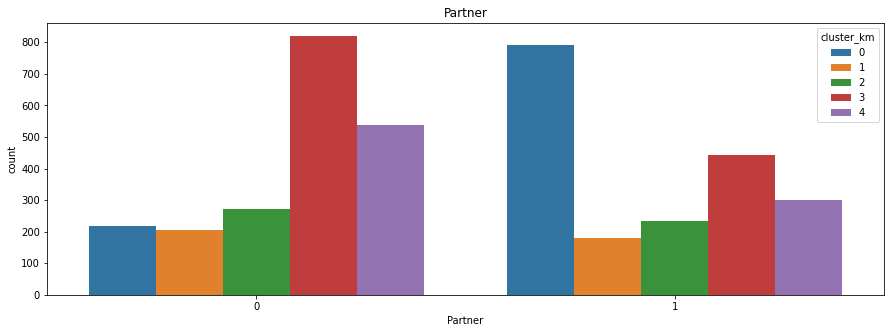

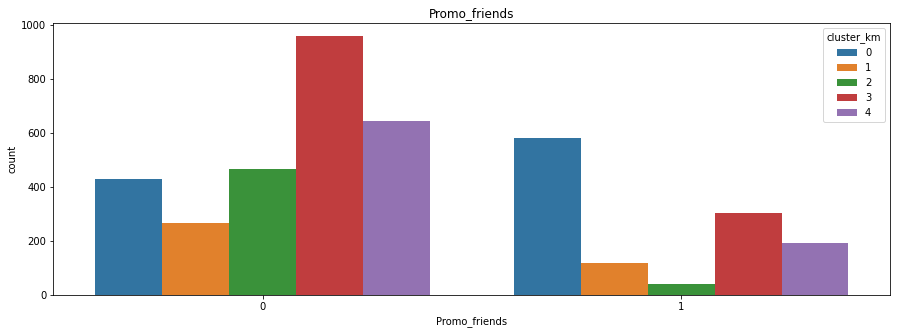

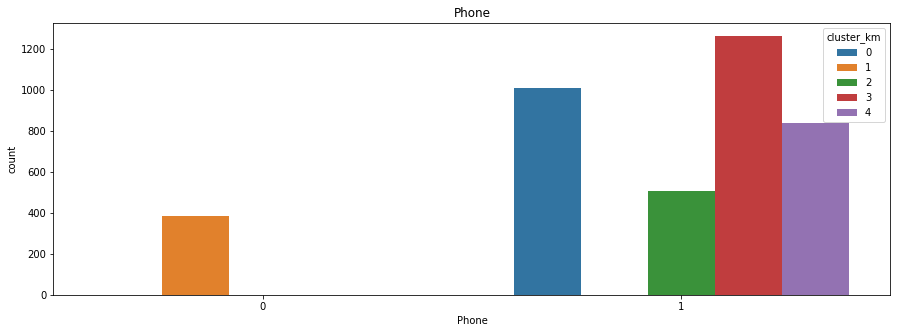

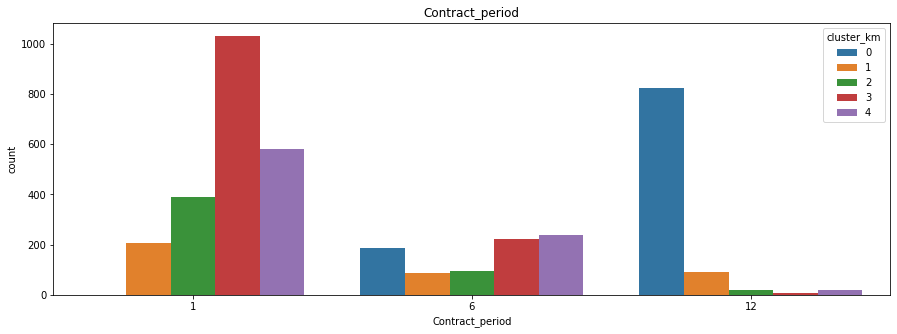

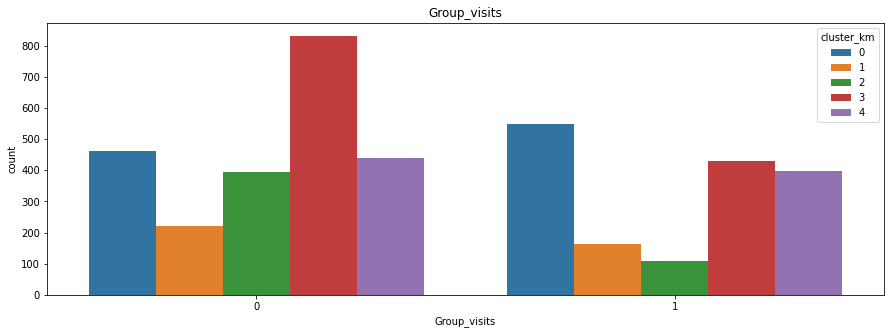

In [14]:
#строим распределение признаков по кластерам
for column in ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Contract_period', 'Group_visits']:
    plt.figure(figsize=(15, 5))
    sns.countplot(x = data[column], hue='cluster_km',  data=data)
    plt.title(column)
    plt.show()

In [15]:
data.columns

Index(['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month',
       'Churn', 'cluster_km'],
      dtype='object')

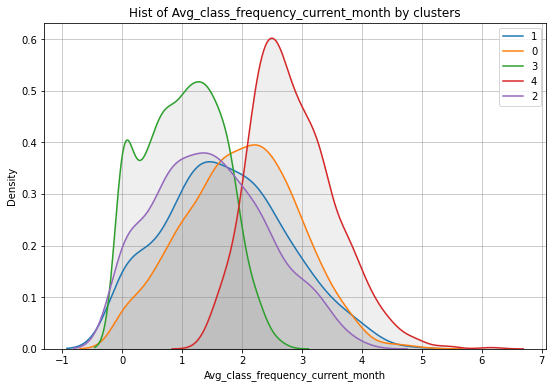

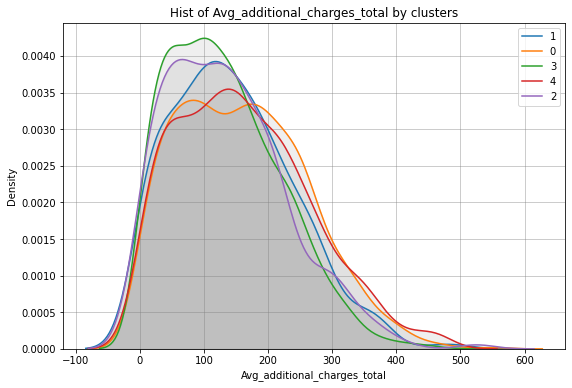

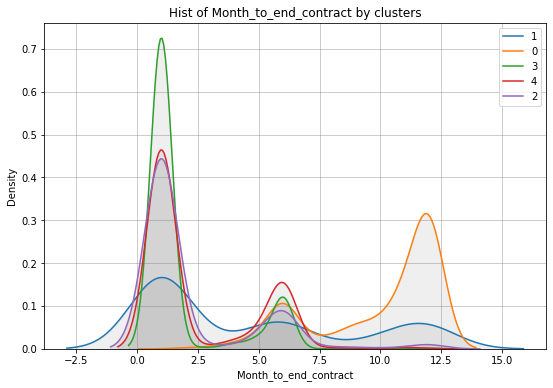

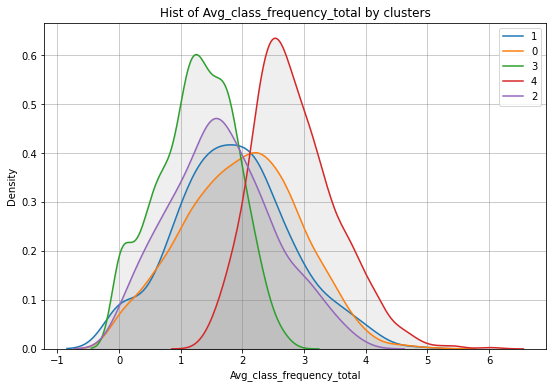

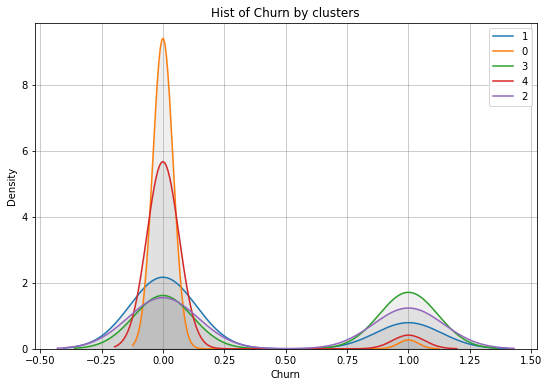

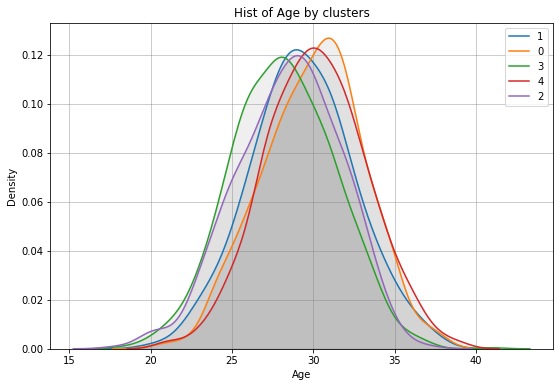

In [16]:
#CODE REVIEW
# непрерывные признаки, возраст, траты, частота посещений и др, также можно использовать боксплоты
for col in ['Avg_class_frequency_current_month', 'Avg_additional_charges_total', 'Month_to_end_contract', 'Avg_class_frequency_total','Churn', 'Age']:
    fig, ax = plt.subplots(figsize=(9, 6))
    for cl in data['cluster_km'].unique():
        # кривая
        sns.kdeplot(data.query("cluster_km==@cl")[col], ax=ax, label=cl)
        #  заполнение
        x = ax.lines[-1].get_xdata()
        y = ax.lines[-1].get_ydata()
        ax.fill_between(x, 0, y, color='grey', alpha=0.125)
    ax.legend()
    ax.set_title(f'Hist of {col} by clusters')
    ax.grid(color='grey', alpha=0.5);

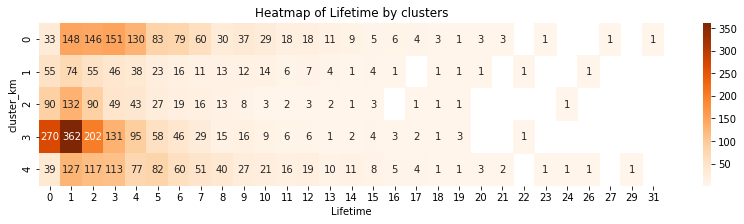

In [17]:
#CODE REVIEW
# дискретные признаки: срок абонемента, lifetime
for col in ['Lifetime']:
    fig, ax = plt.subplots(figsize=(14, 3))
    viz_data = data.reset_index()\
                .pivot_table(
                    index='cluster_km',
                    columns=col,
                    values='index',
                    aggfunc='count'
                    )
    sns.heatmap(viz_data, cmap='Oranges', annot=True, fmt='.0f', ax=ax)
    ax.set_title(f'Heatmap of {col} by clusters')
    ax.grid(False)
    plt.show();

Для бинарных признаков оставляем <code>countplot</code>

In [18]:
# считаем долю оттока
cluster_share = pd.DataFrame({'count': data.groupby('cluster_km')['cluster_km'].count(), 'share': data_group['Churn'].round(2)})
cluster_share.sort_values('count')

,count,share
cluster_km,,
1,385,0.27
2,505,0.44
4,838,0.07
0,1010,0.03
3,1262,0.51


### Выводы по кластеризации клиентов

Нулевой кластер с 1010 клиентами является с наименьшим оттоком - 3 %.
Следом идет четвертый кластер с 7 процентами отока.
Кластер с самым большим оттоком - третий, с 57%.

## Общие выводы

Заказчику стоит обратить внимание на кластер №3 с самыми большим оттоком - 51 процент, так как это и самый многочисленный кластер с 1262 клиентами. С одной стороны такого клиента трудно удержать, так как они в основном живут не в районе спортивного клуба, они берут абонемент на 1 месяц, реже посещают групповые занятия. Возможно это люди, которые купили для интереса абонемент на 1 месяц, и их что-то не устроило в зале. Стоит поинтересоваться у них о причинах оттока. 

В то же время заказчику стоит не обделять вниманием клиентом с нулевого и четвертого кластера с оттоками в 3 и 7 процентов соответственно. Так как они приносят большее количество денег, в том числе и потому что нулевой кластер покупает абонементы на длительный срок (6 и 12 месяцев).

